<a href="https://colab.research.google.com/github/madhurapi/ML-Projects/blob/main/Chemical_Segregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
from scipy import stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from scipy.stats import chi2, chi2_contingency
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
df = pd.read_excel(open( '/content/drive/MyDrive/Colab Notebooks/ML Basic Projects/Chemical Segregation.xlsx','rb'),
              sheet_name='Train data')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.head()

,f1,f2,f3,label
0,-1.239375,0.749101,-0.528515,1
1,-1.036070,0.801436,-1.283712,1
2,-0.615579,1.579521,-1.391927,1
3,1.335978,1.348651,1.433564,0
4,0.658925,1.300019,0.571603,0


In [7]:
df.isnull().sum()

f1       0
f2       0
f3       0
label    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3000 non-null   float64
 1   f2      3000 non-null   float64
 2   f3      3000 non-null   float64
 3   label   3000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 93.9 KB


In [9]:
def overlook(dataframe):
    print('The first 5 rows of dataset:\n',df.head())
    print ('\n')
    print('The no. of row and columns are:\n',df.shape)
    print ('\n')
    print('Datatype of each column is:\n',df.dtypes)
    print ('\n')
    print('The no. of null values in each column are:\n',df.isnull().sum())
    print ('\n')
    print('Data Summary is:\n',df.describe())
    return

overlook(df)

The first 5 rows of dataset:
          f1        f2        f3  label
0 -1.239375  0.749101 -0.528515      1
1 -1.036070  0.801436 -1.283712      1
2 -0.615579  1.579521 -1.391927      1
3  1.335978  1.348651  1.433564      0
4  0.658925  1.300019  0.571603      0


The no. of row and columns are:
 (3000, 4)


Datatype of each column is:
 f1       float64
f2       float64
f3       float64
label      int64
dtype: object


The no. of null values in each column are:
 f1       0
f2       0
f3       0
label    0
dtype: int64


Data Summary is:
                 f1           f2           f3        label
count  3000.000000  3000.000000  3000.000000  3000.000000
mean      0.007453     0.999286     0.029487     0.497000
std       1.334138     1.023853     1.209558     0.500074
min      -3.470773    -3.692615    -3.286481     0.000000
25%      -1.045220     0.325665    -0.986959     0.000000
50%      -0.144115     1.004693     0.225411     0.000000
75%       1.052555     1.693354     1.041319     

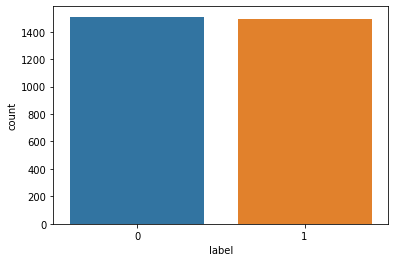

In [10]:
# count plot on single categorical variable
sns.countplot(x ='label', data = df)
 
# Show the plot
plt.show()

In [11]:
df.corr()

,f1,f2,f3,label
f1,1.000000,0.553890,0.650504,-0.763771
f2,0.553890,1.000000,0.137088,-0.012690
f3,0.650504,0.137088,1.000000,-0.817104
label,-0.763771,-0.012690,-0.817104,1.000000


In [12]:
#relation of f2 with label is very low. Hence it may not be affecting. Still the factors are very less ,
# currently dropping of variable is not carried out.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xx = df.iloc[:,[0,1,2]]
y = df.iloc[:,[3]]
Xx.info()
y.info()

vif_data = pd.DataFrame()
vif_data["feature"] = Xx.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xx.values, i)
                          for i in range(len(Xx.columns))]
  
print(vif_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3000 non-null   float64
 1   f2      3000 non-null   float64
 2   f3      3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB
  feature       VIF
0      f1  2.129324
1      f2  1.244966
2      f3  1.812211


In [14]:
#All the VIF are less 10 hence will keep the column.

In [15]:
model_2 = smf.ols(formula = 'label ~ f1 +f2 +f3', data=df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     8637.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:13:24   Log-Likelihood:                 1222.8
No. Observations:                3000   AIC:                            -2438.
Df Residuals:                    2996   BIC:                            -2414.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2734      0.005     57.791      0.0

In [16]:
# According to smf.ols library the equation is:

# label = 0.2734 + (-0.2934 * f1) + (0.2305*f2) + (-0.1540 * f3)

# R -Square : 0.896
# Durbin-Watson : 2.020

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
x = df.iloc[:,[0,1,2]]
y = df.iloc[:,3]  

In [18]:
#solver liblinear
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x, y)

model1.coef_

array([[-3.68470635,  2.8811019 , -2.24745975]])

In [19]:
model1.intercept_

array([-3.84066701])

In [20]:
#Predictions
y_pred = model1.predict(x)

In [21]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[1499   10]
 [   5 1486]]


In [22]:
#Accuracy Score - correct predictions / total number of data points
model1.score(x,y)

0.995

In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model1.predict_proba(x)
fpr, tpr, thresholds =roc_curve(df["label"], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) #Area under Curve 0.997185 
print(roc_auc)

0.9971852320016853


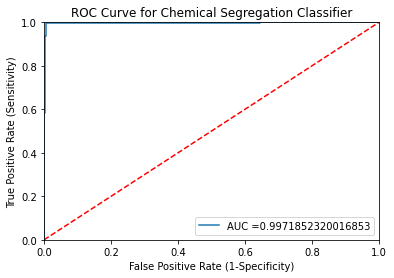

In [24]:
#ROC Curve
plt.title('ROC Curve for Chemical Segregation Classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [25]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1509
           1       0.99      1.00      0.99      1491

    accuracy                           0.99      3000
   macro avg       0.99      1.00      0.99      3000
weighted avg       1.00      0.99      1.00      3000



In [26]:
#solver lbfgs
model2 = LogisticRegression(solver='lbfgs', random_state=0)
model2.fit(x, y)
model2.intercept_


array([-4.27017148])

In [27]:
model2.coef_

array([[-3.92798396,  3.10147056, -2.28040541]])

In [28]:
#Predictions
y_pred = model1.predict(x)

In [29]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[1499   10]
 [   5 1486]]


In [30]:
model2.score(x,y) #0.99533

0.9953333333333333

In [31]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1509
           1       0.99      1.00      0.99      1491

    accuracy                           0.99      3000
   macro avg       0.99      1.00      0.99      3000
weighted avg       1.00      0.99      1.00      3000



In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [52]:
#solver lbfgs
model3 = LogisticRegression(solver='lbfgs', random_state=0)
model3.fit(X_train, y_train)
print(model3.intercept_)

y_pred = model3.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

# train prediction and accuracy
print('train data')
y_pred_train = model3.predict(X_train)
cm = metrics.confusion_matrix(y_train, y_pred_train)
print(cm)

print(classification_report(y_train, y_pred_train))


[-3.93765683]
[[469   5]
 [  1 425]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       474
           1       0.99      1.00      0.99       426

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

train data
[[1030    5]
 [   4 1061]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00      1065

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



In [54]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=200)
model5.fit(X_train,y_train)
#predictions - test
y_pred2=model5.predict(X_test)

print("confusion matrix_test")
print(confusion_matrix(y_test,y_pred2))

print("classification report_test")
print(classification_report(y_test,y_pred2))

#predictions-train
y_pred2_train=model5.predict(X_train)
print("confusion matrix_train")
print(confusion_matrix(y_train,y_pred2_train))

print("classification report_train")
print(classification_report(y_train,y_pred2_train))

confusion matrix_test
[[466   8]
 [  1 425]]
classification report_test
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       474
           1       0.98      1.00      0.99       426

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

confusion matrix_train
[[1030    5]
 [   3 1062]]
classification report_train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00      1065

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100

